In [1]:
import squidpy as sq
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import polars as pl
import matplotlib.pyplot as plt
import altair as alt

/home/jupyter/heart/.venv/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/jupyter/heart/.venv/lib/python3.10/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/home/jupyter/heart/.venv/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


# Read in h5ad file for processed visium data from control_P7 sample

In [2]:
adata = sc.read_h5ad("../../data/spatial/control_P7.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 4992 × 36406
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts', 'n_genes', 'percent.mt', 'Adipocyte', 'Cardiomyocyte', 'Endothelial', 'Fibroblast', 'Lymphoid', 'Mast', 'Myeloid', 'Neuronal', 'Pericyte', 'Cycling.cells', 'vSMCs', 'cell_type_original', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'X_approximate_distribution', 'cell_type_ontology_term_id_colors', 'citation', 'schema_reference', 'schema_version', 'spatial', 'sp

In [4]:
adata.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000243485,True,MIR1302-2HG,NCBITaxon:9606,gene,623,lncRNA
ENSG00000237613,True,FAM138A,NCBITaxon:9606,gene,888,lncRNA
ENSG00000186092,True,OR4F5,NCBITaxon:9606,gene,2618,protein_coding
ENSG00000238009,True,ENSG00000238009.6,NCBITaxon:9606,gene,629,lncRNA
ENSG00000239945,True,ENSG00000239945.1,NCBITaxon:9606,gene,1319,lncRNA
...,...,...,...,...,...,...
ENSG00000277836,True,ENSG00000277836.1,NCBITaxon:9606,gene,288,protein_coding
ENSG00000278633,True,ENSG00000278633.1,NCBITaxon:9606,gene,2404,protein_coding
ENSG00000276017,True,ENSG00000276017.1,NCBITaxon:9606,gene,2404,protein_coding
ENSG00000278817,False,ENSG00000278817.1,NCBITaxon:9606,gene,1213,protein_coding


## Sample metadata

In [5]:
obs_df = pl.from_pandas(adata.obs, include_index=True)
obs_df = obs_df.rename({"None": "cell_id"})

In [6]:
obs_df

cell_id,in_tissue,array_row,array_col,n_counts,n_genes,percent.mt,Adipocyte,Cardiomyocyte,Endothelial,Fibroblast,Lymphoid,Mast,Myeloid,Neuronal,Pericyte,Cycling.cells,vSMCs,cell_type_original,assay_ontology_term_id,cell_type_ontology_term_id,development_stage_ontology_term_id,disease_ontology_term_id,self_reported_ethnicity_ontology_term_id,is_primary_data,organism_ontology_term_id,sex_ontology_term_id,tissue_ontology_term_id,donor_id,suspension_type,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,cat,cat,cat,cat,cat,cat,bool,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,str
"""AAACAACGAATAGTTC-1""",0,0,16,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""EFO:0022857""","""unknown""","""HsapDv:0000149""","""PATO:0000461""","""HANCESTRO:0005""",true,"""NCBITaxon:9606""","""PATO:0000383""","""UBERON:0002084""","""P7""","""na""","""tissue""","""unknown""","""Visium Spatial Gene Expression…","""normal""","""Homo sapiens""","""female""","""heart left ventricle""","""European""","""55-year-old stage""","""S{qkR!yc~8"""
"""AAACAAGTATCTCCCA-1""",1,50,102,2467.0,1274.0,55.466367,0.000014,0.814689,0.123922,0.003872,0.029138,0.00002,0.017536,0.00524,0.004218,0.000898,0.000453,"""Cardiomyocyte""","""EFO:0022857""","""CL:0000513""","""HsapDv:0000149""","""PATO:0000461""","""HANCESTRO:0005""",true,"""NCBITaxon:9606""","""PATO:0000383""","""UBERON:0002084""","""P7""","""na""","""tissue""","""cardiac muscle myoblast""","""Visium Spatial Gene Expression…","""normal""","""Homo sapiens""","""female""","""heart left ventricle""","""European""","""55-year-old stage""","""gFD!+Zqd(i"""
"""AAACAATCTACTAGCA-1""",0,3,43,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""EFO:0022857""","""unknown""","""HsapDv:0000149""","""PATO:0000461""","""HANCESTRO:0005""",true,"""NCBITaxon:9606""","""PATO:0000383""","""UBERON:0002084""","""P7""","""na""","""tissue""","""unknown""","""Visium Spatial Gene Expression…","""normal""","""Homo sapiens""","""female""","""heart left ventricle""","""European""","""55-year-old stage""","""OsSlEREYZW"""
"""AAACACCAATAACTGC-1""",0,59,19,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""EFO:0022857""","""unknown""","""HsapDv:0000149""","""PATO:0000461""","""HANCESTRO:0005""",true,"""NCBITaxon:9606""","""PATO:0000383""","""UBERON:0002084""","""P7""","""na""","""tissue""","""unknown""","""Visium Spatial Gene Expression…","""normal""","""Homo sapiens""","""female""","""heart left ventricle""","""European""","""55-year-old stage""","""zuU(#yRj2="""
"""AAACAGAGCGACTCCT-1""",0,14,94,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""EFO:0022857""","""unknown""","""HsapDv:0000149""","""PATO:0000461""","""HANCESTRO:0005""",true,"""NCBITaxon:9606""","""PATO:0000383""","""UBERON:0002084""","""P7""","""na""","""tissue""","""unknown""","""Visium Spatial Gene Expression…","""normal""","""Homo sapiens""","""female""","""heart left ventricle""","""European""","""55-year-old stage""","""-$<USDZJGm"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""TTGTTTCACATCCAGG-1""",1,58,42,2106.0,1286.0,35.430989,0.000082,0.267972,0.123131,0.371146,0.002863,0.000953,0.078228,0.000682,0.012016,0.087964,0.054963,"""Fibroblast""","""EFO:0022857""","""CL:0002548""","""HsapDv:0000149""","""PATO:0000461""","""HANCESTRO:0005""",true,"""NCBITaxon:9606""","""PATO:0000383""","""UBERON:0002084""","""P7""","""na""","""tissue""","""fibroblast of cardiac tissue""","""Visium Spatial Gene Expression…","""normal""","""Homo sapiens""","""female""","""heart left ventricle""","""European""","""55-year-old stage""","""!-K_Z3vDq*"""
"""TTGTTTCATTAGTCTA-1""",1,60,30,2242.0,1234.0,44.991438,0.000046,0.799141,0.006026,0.158561,0.0017,0.002968,0.027865,0.000931,0.00233,0.000396,0.000035,"""Ca

## Gene metadata

In [7]:
var_df = pl.from_pandas(adata.var, include_index=True)
var_df = var_df.rename({"None": "gene_id"})

In [8]:
var_df

gene_id,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
str,bool,cat,cat,cat,i64,cat
"""ENSG00000243485""",true,"""MIR1302-2HG""","""NCBITaxon:9606""","""gene""",623,"""lncRNA"""
"""ENSG00000237613""",true,"""FAM138A""","""NCBITaxon:9606""","""gene""",888,"""lncRNA"""
"""ENSG00000186092""",true,"""OR4F5""","""NCBITaxon:9606""","""gene""",2618,"""protein_coding"""
"""ENSG00000238009""",true,"""ENSG00000238009.6""","""NCBITaxon:9606""","""gene""",629,"""lncRNA"""
"""ENSG00000239945""",true,"""ENSG00000239945.1""","""NCBITaxon:9606""","""gene""",1319,"""lncRNA"""
…,…,…,…,…,…,…
"""ENSG00000277836""",true,"""ENSG00000277836.1""","""NCBITaxon:9606""","""gene""",288,"""protein_coding"""
"""ENSG00000278633""",true,"""ENSG00000278633.1""","""NCBITaxon:9606""","""gene""",2404,"""protein_coding"""
"""ENSG00000276017""",true,"""ENSG00000276017.1""","""NCBITaxon:9606""","""gene""",2404,"""protein_coding"""


### Extract gene symbols from feature_name

In [9]:
adata.var['ensembl_id'] = adata.var.index
adata.var['gene_symbol'] = adata.var['feature_name'].str.split("_").str[0].astype(str)

In [10]:
adata.var.set_index("gene_symbol", inplace=True, drop=False)
adata.var_names_make_unique()

# Visualization

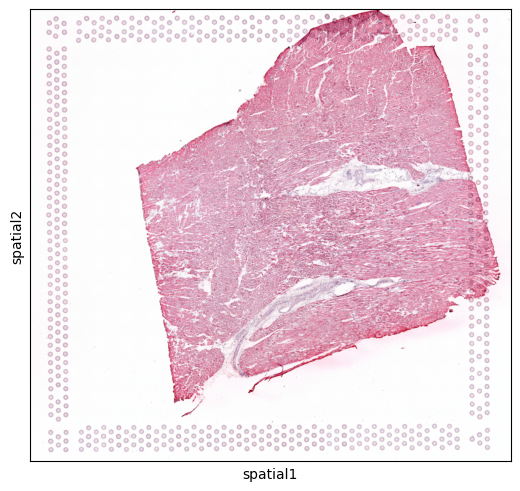

In [11]:
sq.pl.spatial_scatter(
    adata,
    library_id="Visium_3_CK281",
    size=1.5
)

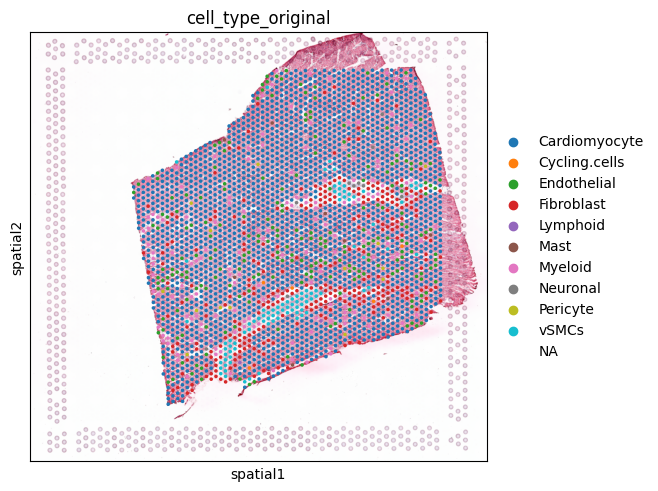

In [12]:
sq.pl.spatial_scatter(adata, color="cell_type_original", library_id="Visium_3_CK281",)

## Cell-type deconvolution results

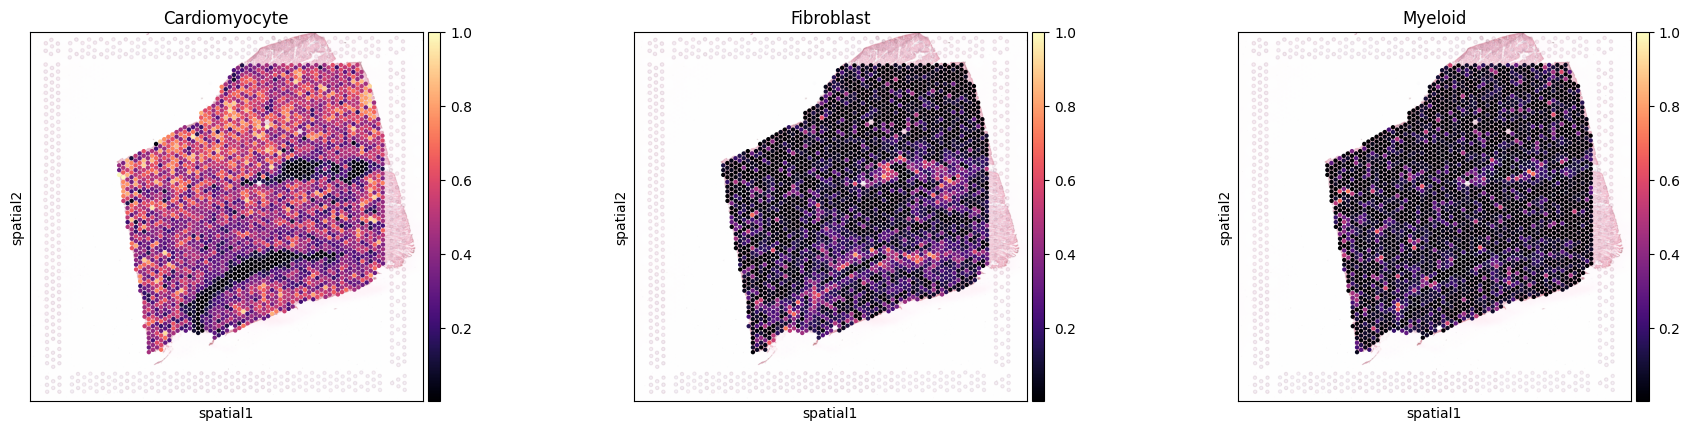

In [13]:
sq.pl.spatial_scatter(
    adata,
    color=["Cardiomyocyte", "Fibroblast", "Myeloid"],
    library_id="Visium_3_CK281",
    size=1.4, img_alpha=0.5, cmap="magma", vmax=1
)

## PROGENy Pathway activity

In [14]:
import decoupler as dc

In [15]:
progeny = dc.op.progeny(organism="human")
progeny

,source,target,weight,padj
0,Androgen,TMPRSS2,11.490631,2.384806e-47
1,Androgen,NKX3-1,10.622551,2.205102e-44
2,Androgen,MBOAT2,10.472733,4.632376e-44
3,Androgen,KLK2,10.176186,1.944410e-40
4,Androgen,SARG,11.386852,2.790210e-40
...,...,...,...,...
62456,p53,ENPP2,2.771405,4.993215e-02
62457,p53,ARRDC4,3.494328,4.996747e-02
62458,p53,MYO1B,-1.148057,4.997905e-02
62459,p53,CTSC,-1.784693,4.998864e-02


In [16]:
adata = dc.mt.ulm(data=adata, net=progeny)

In [17]:
score = dc.pp.get_obsm(adata=adata, key='score_ulm')
score

AnnData object with n_obs × n_vars = 2931 × 14
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts', 'n_genes', 'percent.mt', 'Adipocyte', 'Cardiomyocyte', 'Endothelial', 'Fibroblast', 'Lymphoid', 'Mast', 'Myeloid', 'Neuronal', 'Pericyte', 'Cycling.cells', 'vSMCs', 'cell_type_original', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    uns: 'X_approximate_distribution', 'cell_type_ontology_term_id_colors', 'citation', 'schema_reference', 'schema_version', 'spatial', 'spatial_metadata', 'title', 'cell_type_original_colors'
    obsm: 'X_pca', 'X_umap', 'spatial', 'score_ulm', 'padj_ulm'

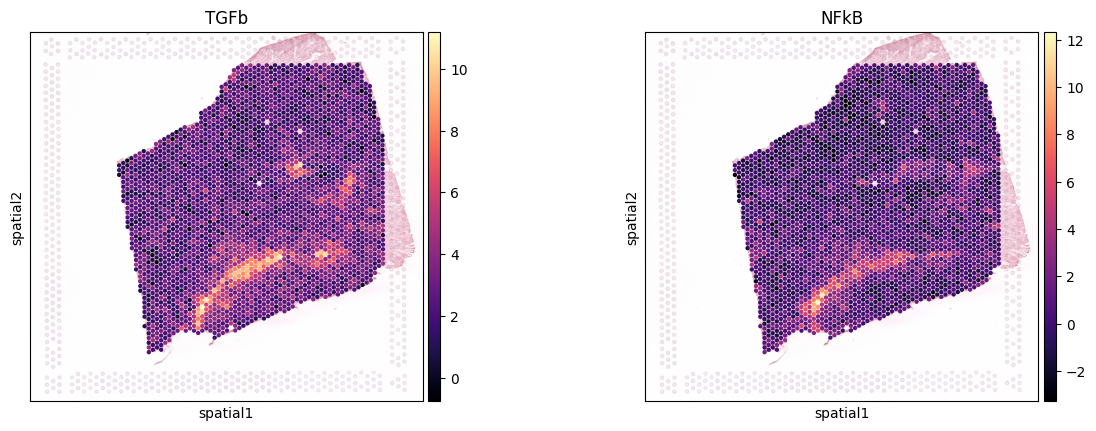

In [18]:
pw = ['TGFb', 'NFkB']
sq.pl.spatial_scatter(
    score,
    color=pw,
    library_id="Visium_3_CK281",
    size=1.4, img_alpha=0.5, cmap="magma"
)

## Transcription factor scores using epiregulon

In [19]:
# Setting up R dependencies
import anndata2ri

anndata2ri.activate()

%load_ext rpy2.ipython

2025-06-26 22:38:11 | [INFO] cffi mode is CFFI_MODE.ANY
2025-06-26 22:38:11 | [INFO] R home found: /opt/conda/envs/r43_env/lib/R
2025-06-26 22:38:11 | [INFO] R library path: /opt/conda/envs/r43_env/lib/R/lib:/opt/conda/envs/r43_env/lib
2025-06-26 22:38:11 | [INFO] LD_LIBRARY_PATH: /opt/conda/envs/r43_env/lib/R/lib:/opt/conda/envs/r43_env/lib
2025-06-26 22:38:11 | [INFO] Default options to initialize R: rpy2, --quiet, --no-save
/home/jupyter/heart/.venv/lib/python3.10/site-packages/rpy2/rinterface/__init__.py:1211: UserWarning: Environment variable "PWD" redefined by R and overriding existing variable. Current: "/home/jupyter", R: "/home/jupyter/heart/notebooks/spatial"
  warnings.warn(
/home/jupyter/heart/.venv/lib/python3.10/site-packages/rpy2/rinterface/__init__.py:1211: UserWarning: Environment variable "R_SESSION_TMPDIR" redefined by R and overriding existing variable. Current: "/var/tmp/Rtmpdz2NVZ", R: "/var/tmp/RtmpwPMEE7"
  warnings.warn(
2025-06-26 22:38:12 | [INFO] R is alread

In [102]:
%reload_ext rpy2.ipython

In [103]:
import rpy2.robjects as ro
print(ro.r('R.version.string'))

['R version 4.0.4 (2021-02-15)']


In [96]:
%%R 
suppressPackageStartupMessages({
    library(reticulate)
    library(ggplot2)
    library(tidyr)
    library(dplyr)
    library(purrr)
    library(tibble)
})

Error in library(reticulate) : there is no package called ‘reticulate’


RInterpreterError: Failed to parse and evaluate line 'suppressPackageStartupMessages({\n    library(reticulate)\n    library(ggplot2)\n    library(tidyr)\n    library(dplyr)\n    library(purrr)\n    library(tibble)\n})\n'.
R error message: 'Error in library(reticulate) : there is no package called ‘reticulate’'